<a href="https://colab.research.google.com/github/darthfelipe21/tf_practice/blob/main/TF_LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  !tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/bin/bash: line 1: tensorflow_version: command not found
2.18.0


In [2]:
# Load data from sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
# Look at data
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
print(data.target_names)

['malignant' 'benign']


In [7]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.3)

In [9]:
N, D = X_train.shape
N,D

(398, 30)

In [10]:
# Estandarizar los datos para que tengan un media de 0 y una varianza de 1 (distribución normal)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Se usa fit_transform para que calcule la media y la desviación estandar de los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Se usa solo transform porque la datos de media y desviación estandar ya fueron calculados dentro del entrenamiento
X_test = scaler.transform(X_test)

In [11]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1, activation='sigmoid')]
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4258 - loss: 1.0715 - val_accuracy: 0.4386 - val_loss: 0.9744
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4621 - loss: 1.0015 - val_accuracy: 0.4678 - val_loss: 0.8948
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5378 - loss: 0.8600 - val_accuracy: 0.5029 - val_loss: 0.8240
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5405 - loss: 0.8412 - val_accuracy: 0.5673 - val_loss: 0.7585
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6116 - loss: 0.7142 - val_accuracy: 0.6257 - val_loss: 0.7019
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6249 - loss: 0.6767 - val_accuracy: 0.6667 - val_loss: 0.6507
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6801 - loss: 0.6262 - val_accuracy: 0.7018 - val_loss: 0.6050
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7037 - loss: 0.5709 - val_accuracy: 0.

In [14]:
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9800 - loss: 0.0881 
Train Score:  [0.1010969802737236, 0.979899525642395]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.1126
Test Score:  [0.10357458889484406, 0.9707602262496948]


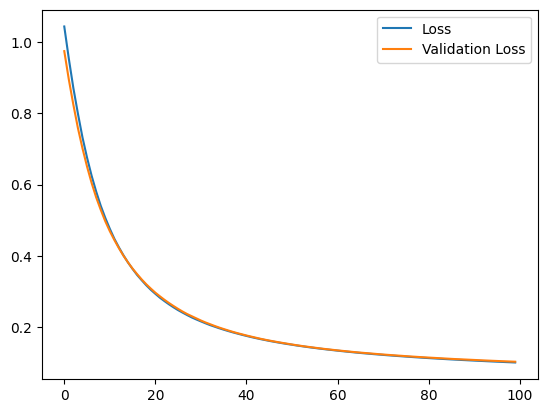

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

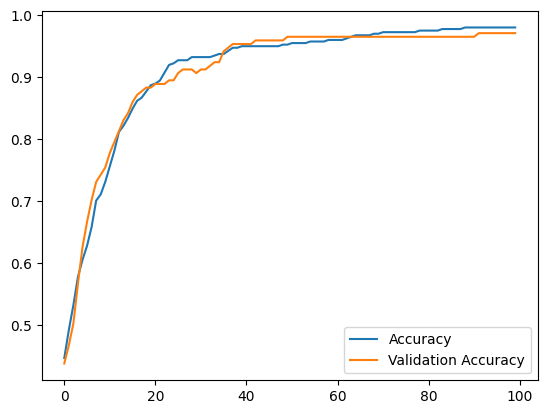

In [17]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()